# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [182]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
import scipy.stats as st
from scipy.stats import norm

In [183]:
medical = pd.read_csv('insurance2.csv')

In [184]:
medical.shape

(1338, 8)

In [185]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The histogram shows that the charges data is right skewed. however, because we are going to draw samples from, the distribution of the means of samples will be normal according to CLT.

In [186]:
# checking if the data is skewed.

medical["charges"].skew()

1.5158796580240388

Text(0, 0.5, 'frequency')

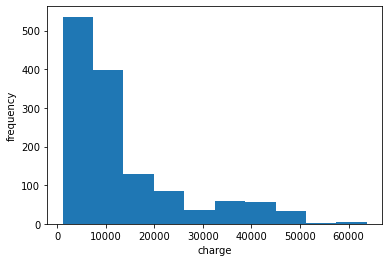

In [187]:
plt.hist(medical["charges"])
plt.xlabel("charge")
plt.ylabel("frequency")

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ In order to find out if the average of medical charges has dropped below 12,000, we draw random samples from the medical charges data. We then estimate the mean of samples and repeat the process. Consequently, according to CLT, we will have a normal distribution of the mean of the averge charges and can do the hypothesis testing. Here I repeat sample drawing 150 times and, the sample size is 50. 

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ One-sided test is relevant. We want to know the lowest value of the average charge considering 95% CI.

In [188]:
# defining the function to draw n samples from the medical charges.

def charge_sampler(n):
    return np.random.choice(medical['charges'], n)

(array([  2.,  24.,  93., 234., 354., 298., 202.,  81.,  39.,  11.]),
 array([ 7756.1513186 ,  8858.84443252,  9961.53754644, 11064.23066036,
        12166.92377428, 13269.6168882 , 14372.31000212, 15475.00311604,
        16577.69622996, 17680.38934388, 18783.0824578 ]),
 <BarContainer object of 10 artists>)

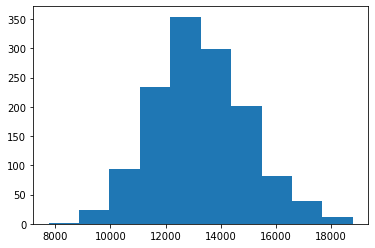

In [206]:
#Drawing 50 samples and finding their mean. Repeating the process 1338 times.

seed(47)
mean50 = []
for _ in range(0,1338):
    sample = charge_sampler(50)
    mean50.append(np.mean(sample))
    
plt.hist(mean50)    

In [195]:
print("The mean of the sampling distribution is ",  np.mean(mean50), "and its standard deviation is ", np.std(mean50,ddof=1)/np.sqrt(50))

The mean of the sampling distribution is  13272.84344426499 and its standard deviation is  240.13835696743502


In [196]:
low = np.mean(mean50) - 1.64*np.std(mean50,ddof=1)/np.sqrt(50)
print('The 95% lower bound of the average charges is ', low )

The 95% lower bound of the average charges is  12879.016538838398


#### __A:__  According to the result and the lower 95% bound of 12879 which is greater than 12000, there should be no concern for the adminastration.

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

####  A: The null hypothesis is that the average charges for the insured and uninsured groups are the same. The alternate is that the averages are not the same. The assumption is that the variance of the two groups are similar.

In [219]:
w_insurance = medical[medical['insuranceclaim']==1]['charges']
no_insurance = medical[medical['insuranceclaim']==0]['charges']

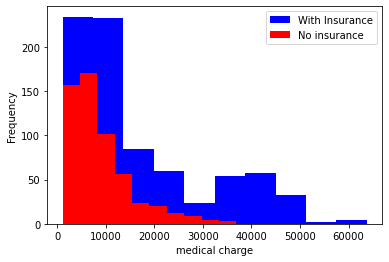

In [233]:
plt.hist(w_insurance, color='blue')
plt.hist(no_insurance, color='red')
plt.xlabel('medical charge')
plt.ylabel('Frequency')
plt.legend(['With Insurance', 'No insurance'])

In [229]:
#Drawing 50 samplesfrom with insurance group and finding their mean. Repeating the process 

seed(47)
mean50_w = []
for _ in range(0, len(w_insurance)):
    sample = np.random.choice(w_insurance, 50)
    mean50_w.append(np.mean(sample))

In [230]:
#Drawing 50 samples from no insurance group and finding their mean. Repeating the process 

seed(47)
mean50_n = []
for _ in range(0, len(no_insurance)):
    sample = np.random.choice(no_insurance, 50)
    mean50_n.append(np.mean(sample))

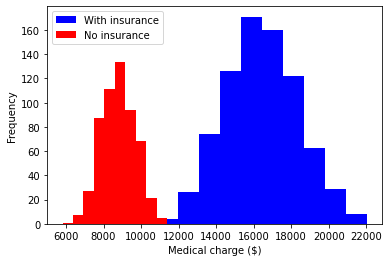

In [232]:
plt.hist(mean50_w, color = 'blue')
plt.hist(mean50_n, color = 'red')
plt.xlabel('Medical charge ($)')
plt.ylabel('Frequency')
plt.legend(['With insurance', 'No insurance'])

In [222]:
# pool_std is a function to estimate standard deviation of the pooled sample.

def pool_std(df1, df2):
    n1, n2 = len(df1), len(df2)
    std1, std2 = np.std(df1, ddof=1), np.std(df2, ddof=1)
    sp = np.sqrt(((n1 - 1) * (std1**2) + (n2 - 1) * (std2**2)) / (n1 + n2 - 2))
    return sp
# t_stats is a function to estimate t-statistic

def t_stats(df1, df2):
    sp = pool_std(df1, df2)
    x0 = np.mean(df1)
    x1 = np.mean(df2)
    n0 = len(df1)
    n1 = len(df2)
    t = ((x0 - x1)/(sp*np.sqrt(1/n0 + 1/n1)))
    return t

In [223]:
# The standard deviation of the pooled sample

pool_std(mean50_w, mean50_n)

1595.1745323119956

In [225]:
# estimating the t-statistic

t_stats(mean50_w, mean50_n)

85.88983687391148

#### __A:__The t-score is very big which will result in a very small p-value (0) and we can reject the null hypothesis.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

In [228]:
# doing the t-test with scipy.stats and using ttest_ind()

st.ttest_ind(mean50_w, mean50_n, axis=0, equal_var=True , alternative='two-sided')

Ttest_indResult(statistic=85.88983687391148, pvalue=0.0)

#### __A:__  The p-value is zerol, so we reject the null hypothesis and accept the alternate, which is that there is diffirence in the average charges the two groups pay. Also, the t-score calculated manually and found by the scipy.stats are similar.

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test